**Parcial #2 de Inteligencia Artificial**

Integrantes:


*   Steven Sebastian Florido Paez
*   Carlos Andres Rojas Rocha
*   Laura Rodriguez



**A) preperacion de los datos**

*Cargue los datos en un DataFrame y asigne los nombres a las columnas.*

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/housing2.csv'
data = pd.read_csv(url)
data

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,"$215000,0"
1,5,6,882.0,Y,896,"$105000,0"
2,6,6,1329.0,Y,1329,"$172000,0"
3,7,5,2110.0,Y,2110,"$244000,0"
4,5,5,928.0,Y,1629,"$189900,0"
...,...,...,...,...,...,...
2925,6,6,1003.0,Y,1003,"$142500,0"
2926,5,5,864.0,Y,902,"$131000,0"
2927,5,5,912.0,Y,970,"$132000,0"
2928,5,5,1389.0,Y,1389,"$170000,0"


*Genere un resumen de los datos a través del método info()y verifique si el tipo de datos de
cada columna es correcto.*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 137.5+ KB


* La columna SalePrice se cambia a flotante
* La columna Central Air cambia su contenido a 0 y 1, donde 0 = No y 1 = Yes





In [ ]:
data['Central Air'] = data['Central Air'].map(lambda x: int(x.replace('Y','1').replace('N','0')))
data['SalePrice'] = data['SalePrice'].map(lambda x: float(x.replace('$','').replace(',','.')))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   int64  
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 137.5 KB


*Genere un conjunto de datos de prueba con el 20% de los datos disponibles. Recuerde no realizar
ningún cambio antes de dividir los datos. Todos los pasos posteriores se realizarán únicamente
sobre el conjunto de datos de entrenamiento. Los datos de prueba no deben manipularse bajo
ninguna circunstancia.*

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=3, shuffle=True)

*Se determina si hay valores nulos*

In [ ]:
train.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

*Verifique si existen valores faltantes. En caso de existir determine cual es la mejor estrategia a
utilizar. Consulte las opciones de la clase SimpleImputer() disponible en Sklearn*

In [ ]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy="mean")

*Realice el proceso de escalado de los datos utilizando la clase StandarScaler()*

In [ ]:
from sklearn.preprocessing import StandardScaler

standar_scaler = StandardScaler()

*Construya un pipeline que incluya los pasos de imputación de valores faltantes y el proceso de
escalado*

In [ ]:
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("numerical_imputer", simple_imputer),
           ("scaler", standar_scaler)])

*Realice las transformaciones sobre los datos de entrenamiento utilizando el pipeline*

In [ ]:
new_train = preprocessor.fit_transform(train[['Overall Qual','Overall Cond','Total Bsmt SF','Central Air','Gr Liv Area']])
new_train = pd.DataFrame(new_train, columns=['Overall Qual','Overall Cond','Total Bsmt SF','Central Air','Gr Liv Area'], index=train.index)
new_train['SalePrice'] = train['SalePrice']
new_train.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2443,1.359084,-0.506931,-0.022379,0.268846,0.929475,286000.0
1512,-1.471385,1.259979,-0.235056,0.268846,-0.401542,108000.0
1411,-0.763768,-0.506931,-0.425346,-3.719603,-1.234401,99600.0
1374,-1.471385,-1.390386,-2.359586,0.268846,0.174454,134432.0
1790,1.359084,-0.506931,1.414868,0.268846,0.380723,307000.0


In [ ]:
new_train.shape

(2344, 6)

**B) Analisis exploratorio**

*Genere un resumen estadístico utilizando el método describe()*

In [ ]:
new_train.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
count,2.344000e+03,2.344000e+03,2.344000e+03,2.344000e+03,2.344000e+03,2344.000000
mean,2.425061e-16,-3.395085e-16,-1.106434e-16,-1.591446e-16,-5.607952e-17,180620.603242
std,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,81141.534863
min,-3.594236e+00,-4.040751e+00,-2.359586e+00,-3.719603e+00,-2.265744e+00,12789.000000
25%,-7.637676e-01,-5.069312e-01,-5.781375e-01,2.688459e-01,-7.347827e-01,129000.000000
50%,-5.615050e-02,-5.069312e-01,-1.410307e-01,2.688459e-01,-1.135440e-01,160000.000000
75%,6.514666e-01,3.765237e-01,5.462513e-01,2.688459e-01,4.896949e-01,213492.500000
max,2.774318e+00,3.026888e+00,1.131889e+01,2.688459e-01,8.063261e+00,755000.000000


*Genere el histograma de frecuencias para todas las características disponibles*

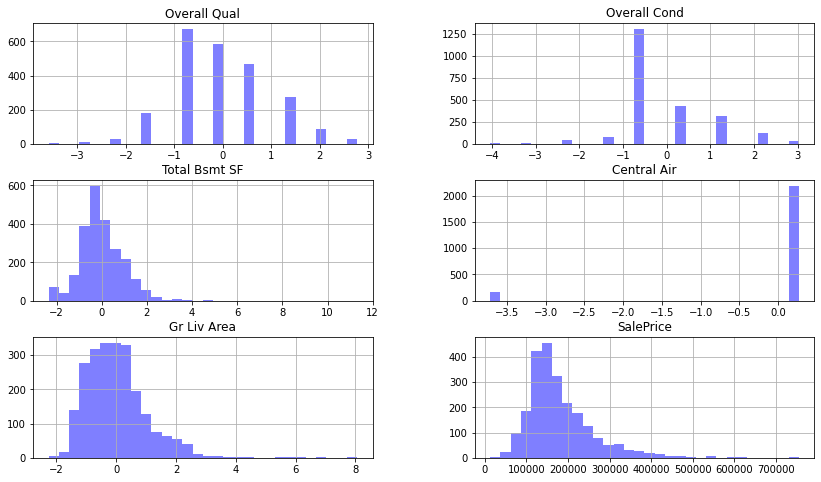

In [ ]:
import matplotlib.pyplot as plt
new_train.hist(bins=30, figsize=(14,8), color="blue", alpha=0.5)
plt.show()

*Identifique posibles valores atípicos en los datos. Elimine los valores utilizando el método IQR (si
lo considera necesario)*

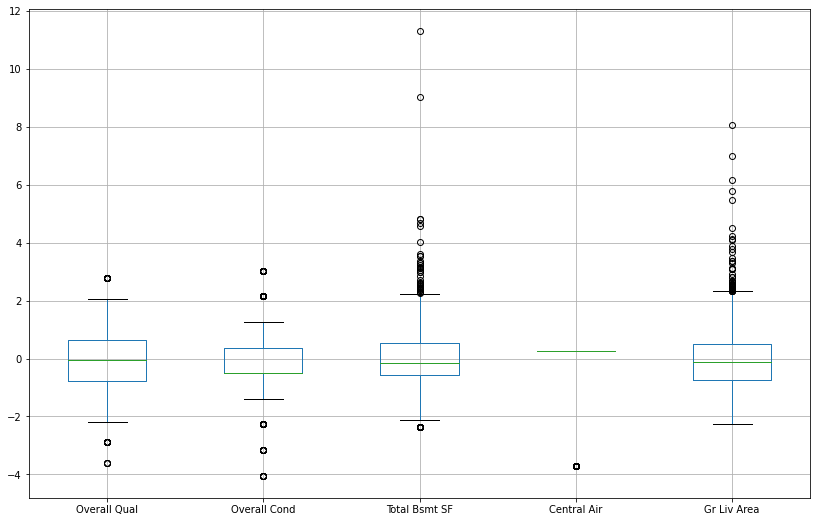

In [ ]:
new_train[['Overall Qual','Overall Cond','Total Bsmt SF','Central Air','Gr Liv Area']].boxplot(figsize=(14,9))
plt.show()

*Si se identificaron valores atipicos, se procede eliminarlos*

In [ ]:
Q1 = new_train .quantile(0.25)
Q3 = new_train .quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

new_train = new_train [~(((new_train  < lower_limit) | (new_train  > upper_limit)).any(axis=1))]
new_train .shape

(1835, 6)

*Genere una matriz de dispersión para identificar correlaciones entre variables.*

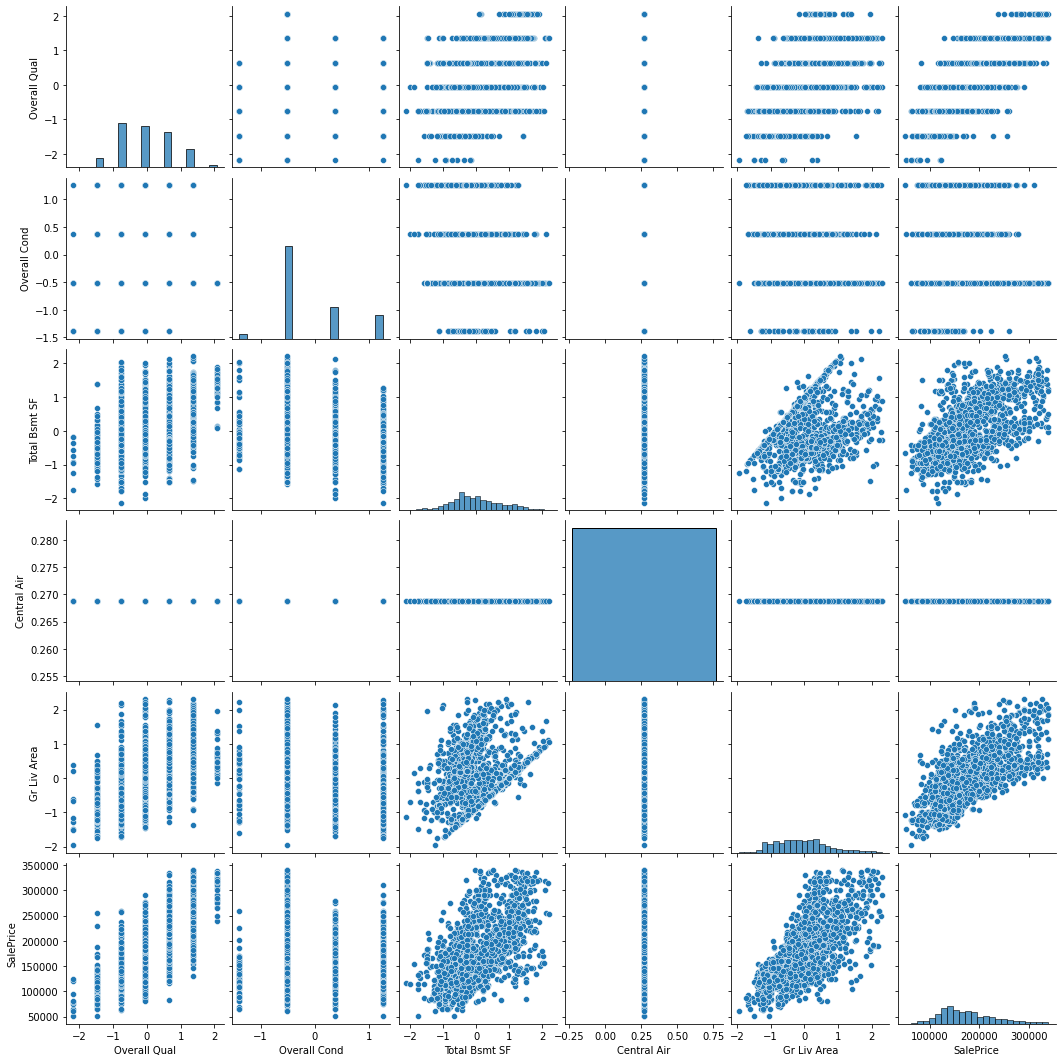

In [ ]:
from seaborn.distributions import kdeplot
import seaborn as sns

sns.pairplot(new_train)

*Genere la matriz de correlación para todas las características y preséntela a través de un mapa
de calor.*

In [ ]:
new_train.corr()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
Overall Qual,1.000000,-0.297979,0.399605,NaN,0.520300,0.785014
Overall Cond,-0.297979,1.000000,-0.257351,NaN,-0.232317,-0.268934
Total Bsmt SF,0.399605,-0.257351,1.000000,NaN,0.297796,0.540300
Central Air,NaN,NaN,NaN,NaN,NaN,NaN
Gr Liv Area,0.520300,-0.232317,0.297796,NaN,1.000000,0.704088
SalePrice,0.785014,-0.268934,0.540300,NaN,0.704088,1.000000


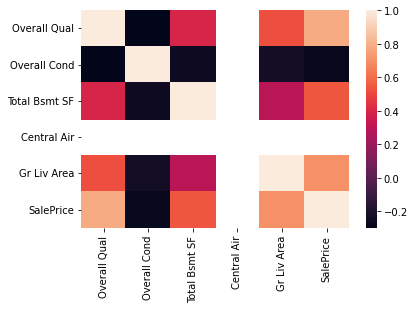

In [ ]:
sns.heatmap (new_train.corr())

In [ ]:
new_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Overall Qual     0.785014
Gr Liv Area      0.704088
Total Bsmt SF    0.540300
Overall Cond    -0.268934
Central Air           NaN
Name: SalePrice, dtype: float64

*Considerando los valores de correlación determine cuales variables podrían tener una mayor
influencia sobre el modelo.*

In [ ]:
#Las variables que mas influencia podrian tener sobre el modelo son Over Qual y Gr Liv Area